In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import sunpy

ImportError: No module named sunpy

In [2]:
f = open("9-6-2017-9-6-2017","r")
#print F.read(5)
l0 = f.readline()
l1 = f.readline()
l2 = f.readline()
l3 = f.readline()

In [3]:
print l0,l1,l2,l3

Author,Lenovo
TimeStamp,9/6/2017  11:09
Sample Clock Rate,0.00




In [4]:
ltest = f.readline()

In [5]:
col0=[]
col1=[]
col2=[]
cont=0

while ltest[0] <> 'A':
    col0.append(cont)
    col1.append(float(ltest[:5]))
    col2.append(float(ltest[9:14]))
    ltest = f.readline()
    cont += 1
else:
    print ltest
    ll1 = f.readline()
    ll2 = f.readline()
    ll3 = f.readline()
    lltest = f.readline()
    print ll1,ll2,ll3,lltest

Author,Lenovo

TimeStamp,9/6/2017  17:09
Sample Clock Rate,0.00

0.951    0.772



In [6]:
start = datetime.strptime("2017-09-06 11:09:00.000", "%Y-%m-%d %H:%M:%S.%f")
end = datetime.strptime("2017-09-06 17:09:00.100", "%Y-%m-%d %H:%M:%S.%f")

In [21]:
dt = start##datetime(2010, 12, 01)
end = end## datetime(2010, 12, 01, 23, 59, 59)
step = timedelta(milliseconds=20)

timlis = []

while dt < end:
    timlis.append(dt)##.strftime('%Y-%m-%d %H:%M:%S.%f'))
    dt += step

In [ ]:
path='/home/douglas/Polarimetro7GHz/'
data = np.genfromtxt(path+'gev_20170906_115300_GOESFLUXdata.txt',\
                     dtype=[('timetag', 'S19'),\
                            ('A FLUX', '>f14'),\
                            ('B FLUX', '>f14')],\
                     delimiter=",",skip_header=1)

fmt="%Y-%m-%d %H:%M:%S"
evehrtime=[]
for i in range(len(data['timetag'])):
    temtime.append(datetime.strptime(data['timetag'][i],fmt))

dat_A = data['A Flux']###-np.nanmin(data['18nm'])
#dat18 = dat18/np.nanmax(dat18)
dat_B = data['B Flux']###-0*np.nanmin(data['26nm'])
#dat26 = dat26/np.nanmax(dat26)
#dat30 = data['30nm']-np.nanmin(data['30nm'])
#dat30 = dat30/np.nanmax(dat30)
#dat36 = data['36nm']-np.nanmin(data['36nm'])
#dat36 = dat36/np.nanmax(dat36)
goestemlc = sunpy.lightcurve.LightCurve.create(
{'A':dat_A,
 'B':dat_B},
    index=temtime)

In [34]:
path='/home/douglas/Polarimetro7GHz/'
data = np.genfromtxt(path+'gev_20170906_115300_GOESTEMdata.txt',\
                     dtype=[('timetag', 'S19'),\
                            ('T', '>f8'),\
                            ('EM', '>f8')],\
                     delimiter=",",skip_header=1)

fmt="%Y-%m-%d %H:%M:%S"
evehrtime=[]
for i in range(len(data['timetag'])):
    temtime.append(datetime.strptime(data['timetag'][i],fmt))

dat_T = data['T']###-np.nanmin(data['18nm'])
#dat18 = dat18/np.nanmax(dat18)
dat_EM = data['EM']###-0*np.nanmin(data['26nm'])
#dat26 = dat26/np.nanmax(dat26)
#dat30 = data['30nm']-np.nanmin(data['30nm'])
#dat30 = dat30/np.nanmax(dat30)
#dat36 = data['36nm']-np.nanmin(data['36nm'])
#dat36 = dat36/np.nanmax(dat36)
goestemlc = sunpy.lightcurve.LightCurve.create(
{'T':dat_T,
 'EM':dat_EM},
    index=temtime)


(736578.4923611111, 736578.4993055556)

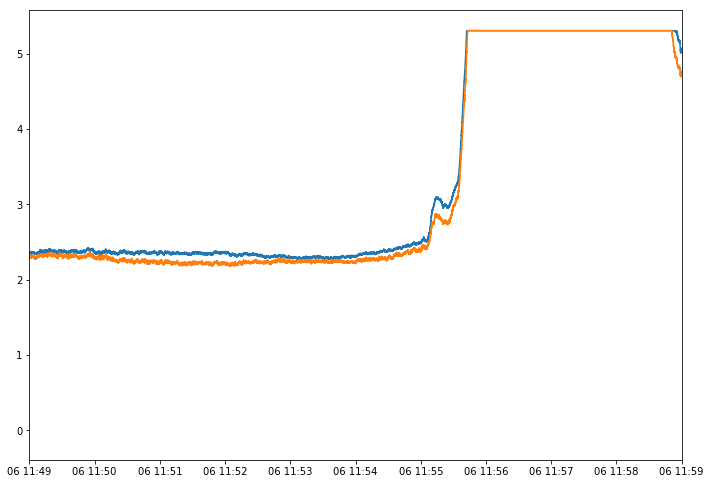

In [32]:
plt.figure(figsize = (11.69,8.27))
ini = datetime.strptime("2017-09-06 11:49:00.000", "%Y-%m-%d %H:%M:%S.%f")
fin = datetime.strptime("2017-09-06 11:59:00.000", "%Y-%m-%d %H:%M:%S.%f")                        
plt.plot(timlis,np.array(col1))
plt.plot(timlis,np.array(col2))
plt.xlim(ini,fin)